# Exploratory Data Analysis

This notebook contains a short Exploratory Data Analysis for the TalkingData AdTracking Fraud Detection Kaggle challenge.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import gc

In [2]:
path = '~/.kaggle/competitions/talkingdata-adtracking-fraud-detection/'

# Load and downcast data types

The datasets of this competition were very big and therefore downcasting data types decreases RAM requirements by a large amount.

In [ ]:
def downcast_dtypes(df):
    '''
        Changes column types in the dataframe: 
                
                `float64` type to `float32`
                `int64`   type to `int32`
    '''
    # Select columns to downcast
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols =   [c for c in df if df[c].dtype == "int64"]
    
    # Downcast
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols]   = df[int_cols].astype(np.int32)
    
    if df.loc[:, 'device'].dtype != 'int16':
        df.loc[:, 'device'] = df.loc[:, 'device'].astype(np.int16)
    if df.loc[:, 'os'].dtype != 'int16':
        df.loc[:, 'os'] = df.loc[:, 'os'].astype(np.int16)
    if df.loc[:, 'channel'].dtype != 'int16':
        df.loc[:, 'channel'] = df.loc[:, 'channel'].astype(np.int16)
    if 'is_attributed' in df.columns:
        df.loc[:, 'is_attributed'] = df.loc[:, 'is_attributed'].astype(np.int8)
    
    if 'day' in df.columns and df.loc[:, 'day'].dtype != 'int8':
        df.loc[:, 'day'] = df.loc[:, 'day'].astype(np.int8)
    
    return df

In [5]:
cols_to_read = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed']

df_train = pd.read_csv(path+'train.csv.zip', usecols=cols_to_read)#, nrows=6000000)
df_train.loc[:, 'click_time'] = pd.to_datetime(df_train.click_time)
df_train = downcast_dtypes(df_train)
print('shape df_train: ' + str(df_train.shape))
df_train.head()

shape df_train: (184903890, 7)


,ip,app,device,os,channel,click_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,0
1,17357,3,1,19,379,2017-11-06 14:33:34,0
2,35810,3,1,13,379,2017-11-06 14:34:12,0
3,45745,14,1,13,478,2017-11-06 14:34:52,0
4,161007,3,1,13,379,2017-11-06 14:35:08,0


In [6]:
cols_to_read = ['ip', 'app', 'device', 'os', 'channel', 'click_time']

df_test = pd.read_csv(path+'test.csv.zip', usecols=cols_to_read)#, nrows=1000000)
df_test.loc[:, 'click_time'] = pd.to_datetime(df_test.click_time)
df_test = downcast_dtypes(df_test)
print('shape df_test: ' + str(df_test.shape))
df_test.head()

shape df_test: (18790469, 6)


,ip,app,device,os,channel,click_time
0,5744,9,1,3,107,2017-11-10 04:00:00
1,119901,9,1,3,466,2017-11-10 04:00:00
2,72287,21,1,19,128,2017-11-10 04:00:00
3,78477,15,1,13,111,2017-11-10 04:00:00
4,123080,12,1,13,328,2017-11-10 04:00:00


In [7]:
df_test_supplement = pd.read_csv(path+'test_supplement.csv.zip', usecols=cols_to_read)#, nrows=50000)
df_test_supplement.loc[:, 'click_time'] = pd.to_datetime(df_test_supplement.click_time)
df_test_supplement = downcast_dtypes(df_test_supplement)
print('shape df_test_supplement: ' + str(df_test_supplement.shape))
df_test_supplement.head()

shape df_test_supplement: (57537505, 6)


,ip,app,device,os,channel,click_time
0,43570,3,1,18,379,2017-11-09 14:23:39
1,80528,3,1,13,379,2017-11-09 14:23:51
2,32323,3,1,13,379,2017-11-09 14:25:57
3,42887,3,1,17,379,2017-11-09 14:26:03
4,119289,58,1,30,120,2017-11-09 14:26:41


In [8]:
df_train.loc[:, 'hour'] = df_train.click_time.dt.hour.astype(np.int8)
df_train.loc[:, 'day'] = df_train.click_time.dt.day.astype(np.int8)
df_train = downcast_dtypes(df_train)

df_test.loc[:, 'hour'] = df_test.click_time.dt.hour.astype(np.int8)
df_test.loc[:, 'day'] = df_test.click_time.dt.day.astype(np.int8)
df_test = downcast_dtypes(df_test)
    
df_test_supplement.loc[:, 'hour'] = df_test_supplement.click_time.dt.hour.astype(np.int8)
df_test_supplement.loc[:, 'day'] = df_test_supplement.click_time.dt.day.astype(np.int8)
df_test_supplement = downcast_dtypes(df_test_supplement)
    
def add_time_features(df):
    df.loc[:, 'minute_of_day'] = df.click_time.dt.hour*60 + df.click_time.dt.minute
    df.loc[:, 'minute_of_day'] = df.minute_of_day.astype(np.uint16)
    
    df.loc[:, 'timeframe_11'] = df.minute_of_day // 11
    df.loc[:, 'timeframe_11'] = df.timeframe_11.astype(np.uint8)
    
    df.loc[:, 'timeframe_17'] = df.minute_of_day // 17
    df.loc[:, 'timeframe_17'] = df.timeframe_17.astype(np.uint8)

add_time_features(df_train)
add_time_features(df_test)
add_time_features(df_test_supplement)

In [9]:
for c in df_train.columns:
    print(c, df_train[c].dtype)

ip int32
app int32
device int16
os int16
channel int16
click_time datetime64[ns]
is_attributed int8
hour int8
day int8
minute_of_day uint16
timeframe_11 uint8
timeframe_17 uint8


In [10]:
for c in df_test.columns:
    print(c, df_test[c].dtype)

ip int32
app int32
device int16
os int16
channel int16
click_time datetime64[ns]
hour int8
day int8
minute_of_day uint16
timeframe_11 uint8
timeframe_17 uint8


In [11]:
for c in df_test_supplement.columns:
    print(c, df_test_supplement[c].dtype)

ip int32
app int32
device int16
os int16
channel int16
click_time datetime64[ns]
hour int8
day int8
minute_of_day uint16
timeframe_11 uint8
timeframe_17 uint8


# Training distribution (time and target)

In [14]:
srs_target_counts = df_train.is_attributed.value_counts()

print('{:0.3f} % of rows are attributed (target = 1)'.format(srs_target_counts[1] / srs_target_counts[0] * 100))

0.248 % of rows are attributed (target = 1)


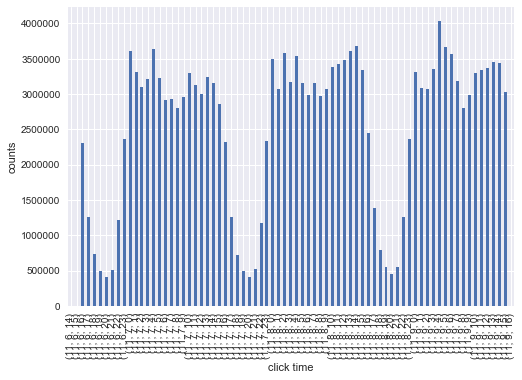

In [15]:
df_train.loc[:, ['click_time', 'ip']].groupby([df_train.click_time.dt.month, 
                                               df_train.click_time.dt.day, 
                                               df_train.click_time.dt.hour]).ip.count().plot(kind="bar")

plt.xlabel('click time')
plt.ylabel('counts')

plt.show()

# Test distribution

The test set is created using a time-based split with some gap between training and test and some gaps within the test. Choice of validation set is probably best by using the same hours of the previous as well as a time-based split. When comparing validation scores with public Leaderboard scores one can also find that the public vs private test split is most likely based on hour 4 vs hour >= 5. Therefore a time-based split between training and validation set on hour >= 5 on the previous seems logical. 

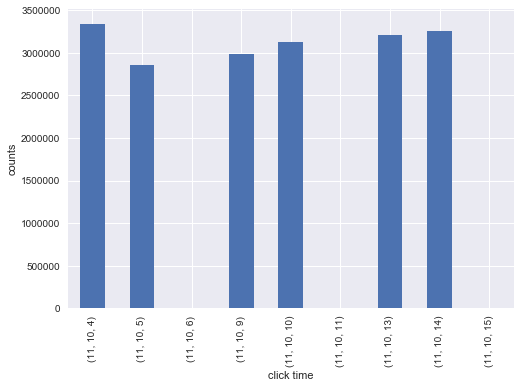

In [28]:
df_test.loc[:, ['click_time', 'ip']].groupby([df_test.click_time.dt.month, 
                                              df_test.click_time.dt.day, 
                                              df_test.click_time.dt.hour]).ip.count().plot(kind="bar")

plt.xlabel('click time')
plt.ylabel('counts')

plt.show()

In [16]:
df_train.describe()

,ip,app,device,os,channel,is_attributed
count,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08,1.849039e+08
mean,9.087604e+04,1.201131e+01,2.172325e+01,2.267702e+01,2.685789e+02,2.470721e-03
std,6.952789e+04,1.480521e+01,2.593326e+02,5.525282e+01,1.295882e+02,4.964491e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.024500e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00
50%,7.962200e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.580000e+02,0.000000e+00
75%,1.182470e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,3.647780e+05,7.680000e+02,4.227000e+03,9.560000e+02,5.000000e+02,1.000000e+00


# Distributions of nomical categoric columns

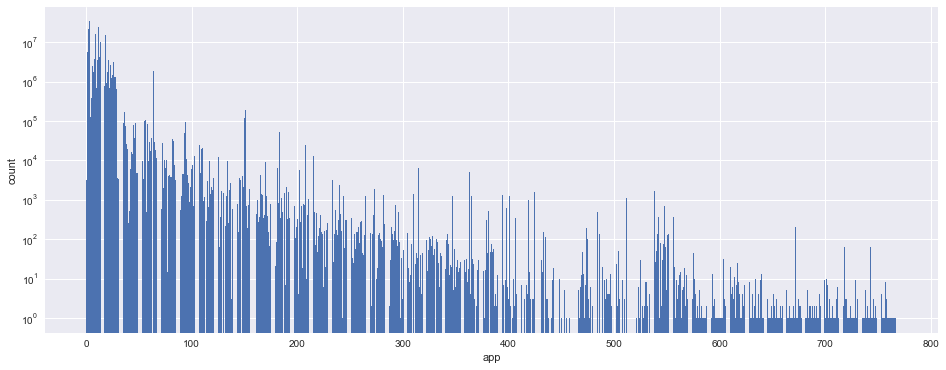

149813

In [17]:
plt.figure(figsize=(16,6))

df_train_gby_app = df_train.app.value_counts()
plt.bar(df_train_gby_app.index, df_train_gby_app.values)

plt.xlabel('app')
plt.ylabel('count')

plt.yscale('log')

plt.show()

del df_train_gby_app
gc.collect()

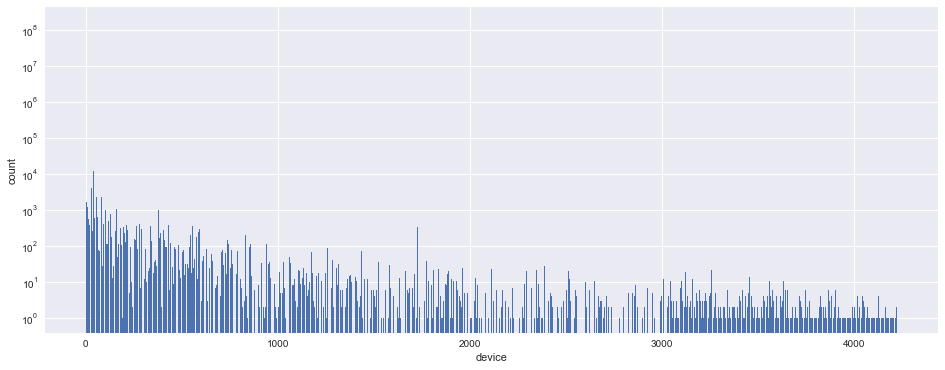

620158

In [18]:
plt.figure(figsize=(16,6))

df_train_gby_device = df_train.device.value_counts()
plt.bar(df_train_gby_device.index, df_train_gby_device.values)

plt.xlabel('device')
plt.ylabel('count')

plt.yscale('log')

plt.show()

del df_train_gby_device
gc.collect()

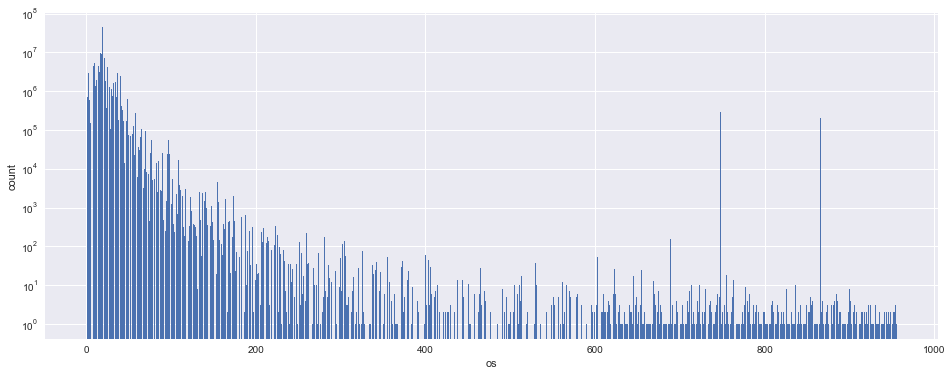

165243

In [19]:
plt.figure(figsize=(16,6))

df_train_gby_os = df_train.os.value_counts()
plt.bar(df_train_gby_os.index, df_train_gby_os.values)

plt.xlabel('os')
plt.ylabel('count')

plt.yscale('log')

plt.show()

del df_train_gby_os
gc.collect()

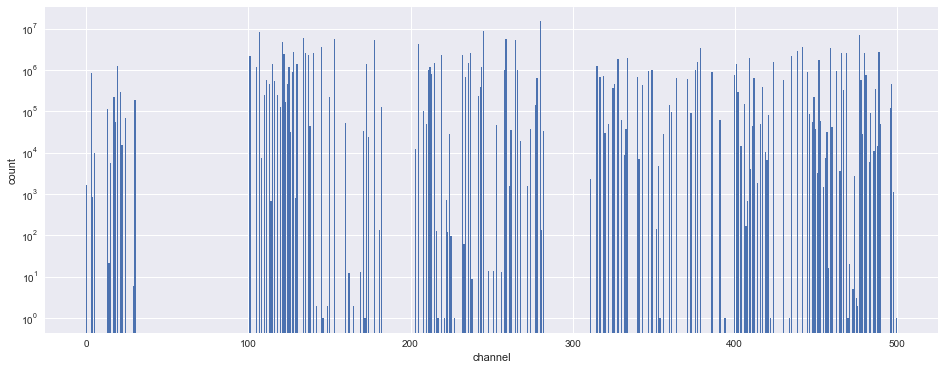

55630

In [ ]:
plt.figure(figsize=(16,6))

df_train_gby_channel = df_train.channel.value_counts()
plt.bar(df_train_gby_channel.index, df_train_gby_channel.values)

plt.xlabel('channel')
plt.ylabel('count')

plt.yscale('log')

plt.show()

del df_train_gby_channel
gc.collect()

## test vs test_supplement
test_supplement.csv was the test set early in the competition but was later replaced by a subset because it was too big for the grader. It is essential to understand how the organizers subsampled the test set. In the following plots one can see that the subset was created by some choice of hours.

It is most likely essential to make use of test_supplement.csv instead of test.csv for engineering some features.

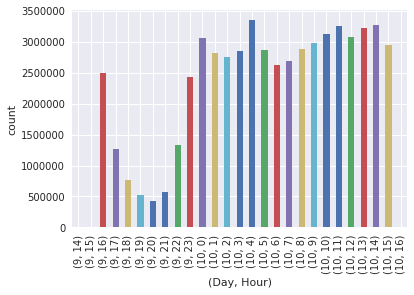

In [12]:
df_test_supplement.loc[:, ['ip', 'click_time']].groupby([df_test_supplement.click_time.dt.day,
                                                         df_test_supplement.click_time.dt.hour]) \
    .ip.count().plot(kind='bar')

plt.xlabel('(Day, Hour)')
plt.ylabel('count')

plt.show()

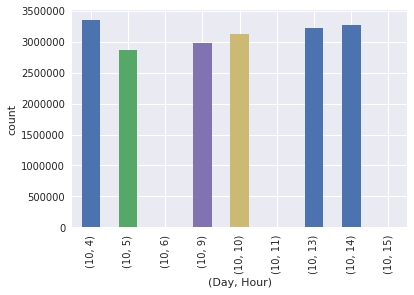

In [13]:
df_test.loc[:, ['ip', 'click_time']].groupby([df_test.click_time.dt.day, df_test.click_time.dt.hour]) \
    .ip.count().plot(kind='bar')

plt.xlabel('(Day, Hour)')
plt.ylabel('count')

plt.show()